<a href="https://colab.research.google.com/github/Karima2020/My_Final-Project-CNN-CIFAR-10/blob/master/Final_Project_Karima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
import numpy as np


In [0]:
#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalize 
x_train = (x_train)/255
x_test = (x_test)/255
y_train1=y_train
y_test1=y_test
num_classes = 10

y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)



class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

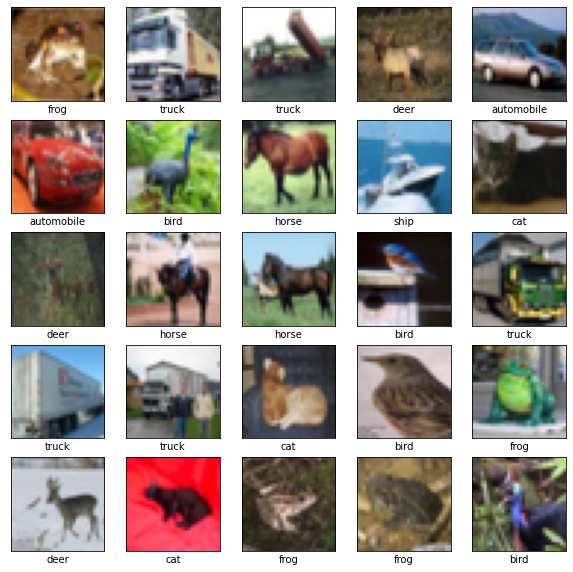

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
from tensorflow.keras import datasets, layers, models
weight_decay = 1e-4
modell = models.Sequential()
modell.add(layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
modell.add(layers.Activation('relu'))
 
modell.add(layers.BatchNormalization())

modell.add(layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
modell.add(layers.Activation('relu'))
 
modell.add(layers.BatchNormalization())

modell.add(layers.MaxPooling2D(pool_size=(2,2)))
modell.add(layers.Dropout(0.2))






In [0]:
modell.add(layers.Conv2D(64, (3,3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
modell.add(layers.BatchNormalization())
modell.add(layers.Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
modell.add(layers.BatchNormalization())

modell.add(layers.MaxPooling2D(pool_size=(2,2)))
modell.add(layers.Dropout(0.3))
 
modell.add(layers.Conv2D(128, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))

modell.add(layers.BatchNormalization())
modell.add(layers.Conv2D(128, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
modell.add(layers.BatchNormalization())

modell.add(layers.MaxPooling2D(pool_size=(2,2)))
modell.add(layers.Dropout(0.4))

In [35]:
modell.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)       

In [0]:
modell.add(layers.Flatten())
modell.add(layers.Dense(10, activation='softmax'))

In [41]:
modell.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)       

In [0]:
class MyCustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(epoch % 5==0):
      print("ur epoch is",epoch)
      print("------------------------------ *******Details on test data :) ******------------------------------")
      print('loss  on validation data :(  is :',logs.get('val_loss'))
      print('Accuracy reaced on validation data :) is:', logs.get('val_accuracy'))
      print("------------------------------ ****Now Details on train data :)**** ------------------------------")
      print('loss  on train data :(  is :', logs.get('loss'))
      print('Accuracy reached on train data :) is:', logs.get('accuracy'))

In [45]:
cb=MyCustomCallback()
opt = tf.keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
modell.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history=modell.fit(x_train, y_train, batch_size=64,epochs=125,
                    verbose=0,validation_data=(x_test,y_test),callbacks=[cb])

ur epoch is 0
------------------------------ *******Details on test data :) ******------------------------------
loss  on validation data :(  is : 1.2625261545181274
Accuracy reaced on validation data :) is: 0.5896999835968018
------------------------------ ****Now Details on train data :)**** ------------------------------
loss  on train data :(  is : 1.7671902179718018
Accuracy reached on train data :) is: 0.48927998542785645
ur epoch is 5
------------------------------ *******Details on test data :) ******------------------------------
loss  on validation data :(  is : 0.8878127336502075
Accuracy reaced on validation data :) is: 0.7515000104904175
------------------------------ ****Now Details on train data :)**** ------------------------------
loss  on train data :(  is : 0.7309040427207947
Accuracy reached on train data :) is: 0.7864999771118164
ur epoch is 10
------------------------------ *******Details on test data :) ******------------------------------
loss  on validation dat

In [47]:
test_loss, test_acc = modell.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.7288 - accuracy: 0.8435


In [0]:
predect_ind_list = np.argmax(modell.predict(x_test),1)

In [50]:
print(predect_ind_list)

[3 8 1 ... 5 1 7]


In [51]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [52]:
print(y_test1)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [53]:
test_lb=[]
for i in range(len(y_test1)):
  test_lb.append(y_test1[i][0])
print(test_lb)

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5, 3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3, 

Right Prediction :D

In [64]:
is_it_correct=(predect_ind_list==test_lb)
print(is_it_correct[0])
correct=(predect_ind_list==test_lb)
iscorrect=[]

#I just wanna check if my work is right
for i in range(len(is_it_correct)):
  if(is_it_correct[i]==True):
    iscorrect.append(is_it_correct[i])

#here are images that are predicted in a good way :)
images_right=x_test[correct]
label_good=predect_ind_list[correct]
print(len(x_test))
print(iscorrect)

True
ERROR! Session/line number was not unique in database. History logging moved to new session 66
10000
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,

In [66]:
print("sum of ur correct predictions %d" % sum(correct))
#Same thing :D Good Job 
print(len(iscorrect))

sum of ur correct predictions 8435
8435


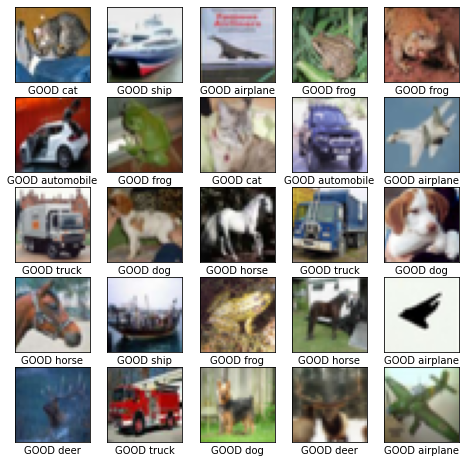

In [67]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_right[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, that's why you need an extra index
    plt.xlabel("GOOD " +class_names[label_good[i]])
plt.show()

Wrong Prediction :( 

In [82]:
incorrect=(is_it_correct==False)
nocorrect=[]
#I just put it to check if my calculation is right n it is :D
for i in range(len(is_it_correct)):
  if(is_it_correct[i]==False):
    nocorrect.append(is_it_correct[i])


images_eror=x_test[incorrect]
labels_eror=predect_ind_list[incorrect]
labels_true=y_test1[incorrect]
a=[1,2,3,4,5,6]

print(y_test1)
print(predect_ind_list)
print(len(nocorrect))
print("sum of ur incorrect predictions %d" % sum(incorrect))

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[3 8 1 ... 5 1 7]
1565
sum of ur correct predictions 1565


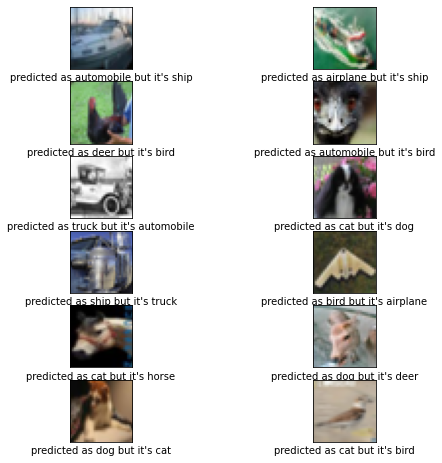

In [85]:
plt.figure(figsize=(8,8))
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_eror[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel("predicted as " +class_names[labels_eror[i]]+" but it's "+class_names[labels_true[i][0]])
plt.show()

# **# Here Iam gonna plot Loss and val loss :( **

Text(0.5, 1.0, 'loss curves')

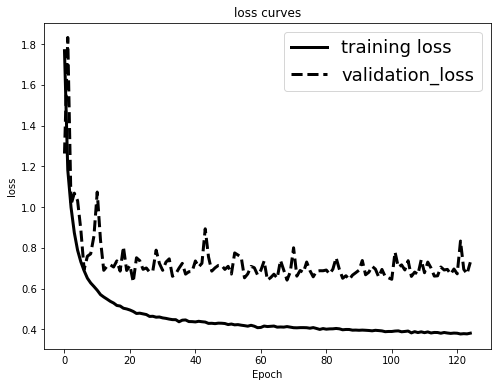

In [86]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls='--',linewidth=3.0)
plt.legend(['training loss','validation_loss'],fontsize=18)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('loss curves')

# *Here i am gonna plot accuracy and val accuracy *

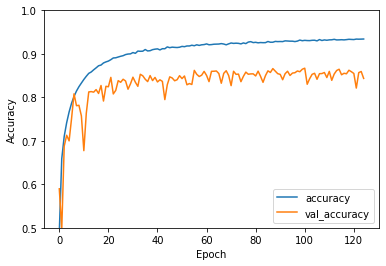

In [87]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')